# **CSCE 5218 / CSCE 4930 Deep Learning**

# **HW1a The Perceptron** (20 pt)


In [4]:
# Get the datasets
!wget http://huang.eng.unt.edu/CSCE-5218/test.dat
!wget http://huang.eng.unt.edu/CSCE-5218/train.dat


--2024-02-18 15:42:26--  http://huang.eng.unt.edu/CSCE-5218/test.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2844 (2.8K)
Saving to: 'test.dat'

     0K ..                                                    100% 76.6M=0s

2024-02-18 15:42:26 (76.6 MB/s) - 'test.dat' saved [2844/2844]

--2024-02-18 15:42:26--  http://huang.eng.unt.edu/CSCE-5218/train.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11244 (11K)
Saving to: 'train.dat'

     0K ..........                                            100%  637K=0.02s

2024-02-18 15:42:26 (637 KB/s) - 'train.dat' saved [11244/11244]



In [5]:
# Take a peek at the datasets
!head train.dat
!head test.dat

'head' is not recognized as an internal or external command,
operable program or batch file.
'head' is not recognized as an internal or external command,
operable program or batch file.


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [3]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
    # array1 should be weights because instance has 1 more collumn 
    array=sum([array1[i] * array2[i] for i in range(len(array1))]) 
    return array 


def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    z=1/(1+math.exp(-x))
    return z

# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weight, instance):
    #TODO: return the output of the model 
    z=sigmoid(dot_product(weight, instance))
    return z

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    z = output(weights, instance)
    return 1 if z >= 0.5 else 0
    


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #TODO: name this step
    #initial weights with value 0 according to the length of the instance-1
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            #TODO: name these steps
            #calculte the "error" value for each instance
            in_value = dot_product(weights, instance)
            output = sigmoid(in_value)
            error = instance[-1] - output
            #TODO: name these steps
            #update weights using backpropagation,a mechanism used to update the weights using gradient descent.
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [3]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)

Two views will exlain the reason

Firstly from the code meaning:

The first code snippet represent the process of learning and training from the training example which means updating the weights backpropagation,a mechanism used to update the weights using gradient descent, and minimizing the error between the "initial value" passing through the activation function and target value.

The second code snippet using the prediction value (0 or 1)instead of the training value(learning from the activation function) to minimize the error makes no sense. Calculate the error distance with the prediction value and the real target value is not meaningful. We minimize the error with our "initial value" passing through the activation function and the target value using backpropagation that will be making sense.

Secondly from the calculation views:

The predict function output 0 or 1. our initial weight is 0 in this code. the second code snippet use predict methed which means the ouptput function is always 1 because sigmoid(0)=0.5 which is >= 0.5 so the output is 1.

Accourding to the equation ( weights[i] += lr * error * output * (1-output) * instance[i]), the weight will not be updated correctly as the output is always equal to 1 and the equation will be 0. So the weights will keep 0 and not be updated correctly.

### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 


In [7]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate
#accuracy_result = {}
accuracy_result = []
i = -1
for lr in lr_array:
  accuracy_result.append([])
  i += 1
  j = -1
  for tr_size in tr_percent:
    accuracy_result[i].append([])
    j += 1
    for epochs in num_epochs:
      
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
      #accuracy_result[x][y][z].append(accuracy)
      accuracy_result[i][j].append(accuracy)
      print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  20, lea

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



Question 3-A

No, don't need to train with all the traning dataset.
This is the result from the previous running. We can see 75% of datasets reaches the same accuracy of 100% of datasets.

#tr: 300, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0

In fact, in many cases, training with the entire dataset might not even be feasible due to computational constraints or time limitations.Training on the entire dataset may lead to overfitting, especially if the dataset is not diverse enough.Training with all the available training data might improve the model's performance to some extent, but it's not guaranteed to yield the highest accuracy on the test dataset. In many cases, using techniques such as cross-validation or early stopping can help improve the model's generalization performance without requiring training on the entire dataset.
The goal is to build a model that generalizes well to unseen data. Achieving the highest accuracy on the training set does not necessarily translate to the highest accuracy on the test set. It’s a balance between bias (underfitting) and variance (overfitting)

Question 3-B


According to the question's example, we can find that the learning rate of first run is 0.05 and the second is 0.005 which means the first is much faster to reach the minimum of loss function( If the learning rate is too large, the training might become unstable or learn a sub-optimal set of weights too quickly). The learning rate like the step size. The second run of the training process may take more epoches to reach reach the minimum of loss function and could get stuck because of the small step size. Then the accuracy will decrease.

If the two run has the same learning rate and the second run using more training data, but the accuracy decrease. It maybe the reason the second run has more noise data that makes the model overfit.

Question 3-C


Yes, with additional hyperparameters like Feature Engineering,Regularization,Early Stopping,Learning Rate Scheduling,Batch Training,add more hidden layer,add more neurons,Cross-Validation. It will get higher accuracy.

Or fine tunning the learning rate to 1
tr: 400, epochs: 100, learning rate: 1.0
you will get the accuracy to 81%
#tr: 400, epochs: 100, learning rate: 1.000; Accuracy (test, 100 instances): 81.0

Question 3-D


No. Training for more epochs doesn't necessarily guarantee better performance. With a larger dataset, training for more epochs might be necessary to ensure that the model has seen enough examples to generalize well. Conversely, with a smaller dataset, training for too many epochs could lead to overfitting.





In [5]:
#Question 3-C
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_size=100
size =  round(len(instances_tr)*tr_size/100)
pre_instances = instances_tr[0:size]
lr = 1
epochs = 100
weights = train_perceptron(pre_instances, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs: 100, learning rate: 1.000; Accuracy (test, 100 instances): 81.0


(68.0, 81.0)

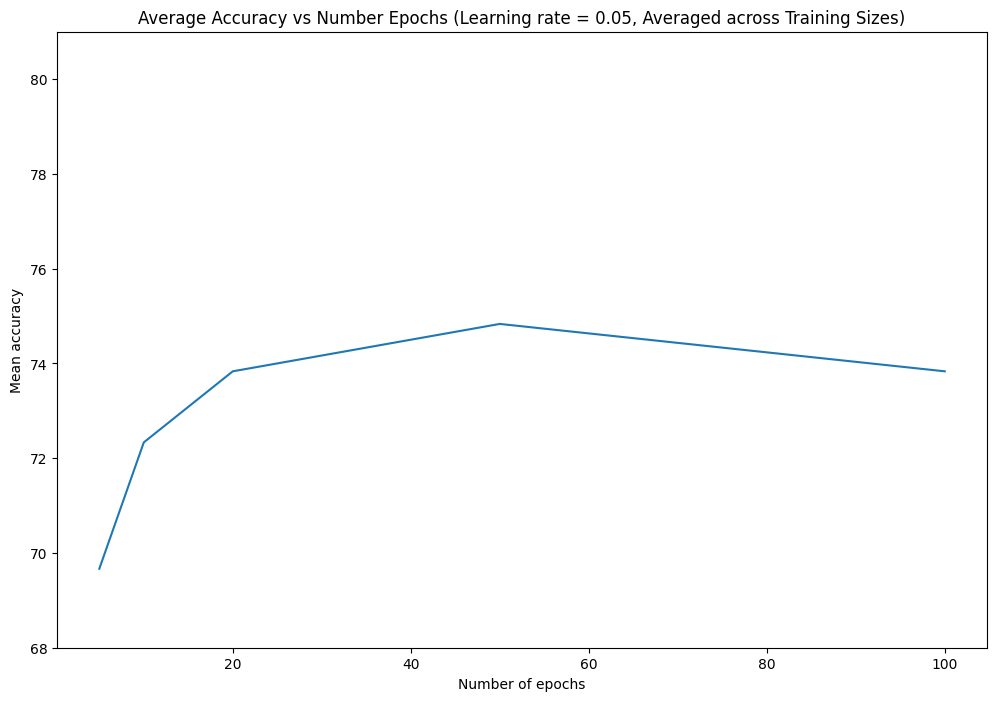

In [11]:
#Question 3-D
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12.0, 8.0]
accuracy_result = np.asarray(accuracy_result)
mean_epochs = np.mean(accuracy_result, axis=1)
# Plot mean accuracy vs number epochs with learning rate = 0.05
plt.plot(num_epochs, mean_epochs[2])
plt.title(f'Average Accuracy vs Number Epochs (Learning rate = 0.05, Averaged across Training Sizes)')
plt.xlabel('Number of epochs')
plt.ylabel('Mean accuracy')
plt.ylim(68, 81)

To summarize, the precision of the model typically enhances with more extensive training sets and a higher number of epochs. However, there are limitations to these improvements. After a certain point, augmenting the number of epochs can lead to overfitting, resulting in a decrease in accuracy on the unseen test dataset. Interestingly, for reasons yet to be fully understood, the accuracy appears to plateau when training on the initial 75% of the data, at least for this particular dataset.

Regarding the learning rate, it primarily functions to either intensify or dampen these trends, as the weights adjust themselves by larger or smaller increments. In some instances, a learning rate that is too small fails to converge within the given number of epochs for training because the weight adjustments are too minute to reach the minimum. Conversely, a learning rate that is too large fails to converge because the weight changes are too extreme, causing it to overshoot the minimum and land on a higher loss.